In [1]:
#!/usr/bin/env python3

import numpy as np
import matplotlib.pyplot as plt
import sys

from utility import load_mnist_images, load_mnist_labels, sigmoid, \
init_parameters, create_batch, extract_target_data, split_holdout

from Logistic_Regression_MNIST import LogisticRegression
from Softmax_Regression_MNIST import SoftmaxRegression

In [2]:
train_images = load_mnist_images('train-images.idx3-ubyte', 20000)
train_labels = load_mnist_labels('train-labels.idx1-ubyte', 20000)
test_images = load_mnist_images('t10k-images.idx3-ubyte')
test_labels = load_mnist_labels('t10k-labels.idx1-ubyte')

test_images = test_images[-2000:]
test_labels = test_labels[-2000:]

'''
# Show A Image
plt.gray()
plt.imshow(train_images_ori[50])
plt.show()
'''

m_train = train_images.shape[0] # number of training data
m_test = test_images.shape[0] # number of test data

train_images = train_images.reshape(m_train, -1).T / 255.
test_images = test_images.reshape(m_test, -1).T / 255.

In [3]:
def plot_cost_acc(train, val, test):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(211)
    tc_plt, = ax1.plot(train['cost'], label='Training Cost')
    vc_plt, = ax1.plot(val['cost'], label='Validation Cost')
    tec_plt, =  ax1.plot(test['cost'], label='Test Cost')
    ax1.legend(handles=[tc_plt, vc_plt, tec_plt])
    ax2 = fig1.add_subplot(212)
    ta_plt, = ax2.plot(train['accuracy'], label='Training Accuracy')
    va_plt, = ax2.plot(val['accuracy'], label='Validating Accuracy')
    tea_plt, =  ax2.plot(test['accuracy'], label='Test Accuracy')
    ax2.legend(handles=[ta_plt, va_plt, tea_plt], loc=4)
    plt.show()

def plot_weight_image(w):
    weight = w.reshape(28,28)
    
    fig2 = plt.figure()
    plt.gray()
    ax3 = fig2.add_subplot(111)
    ax3.imshow(weight)
    plt.show()

In [6]:
def logistic_classifier(train_images, train_labels, test_images, test_labels, c1, c2, holdout_ratio=0.1):
    train_X, train_Y = extract_target_data(train_images, train_labels, c1, c2)
    test_X, test_Y = extract_target_data(test_images, test_labels, c1, c2)
    
    train_X, train_Y, holdout_X, holdout_Y = split_holdout(train_X, train_Y, holdout_ratio)

    n_feature = train_X.shape[0]

    logistic_model = LogisticRegression(n_feature, n_epoch=400, record=True, record_period=20)
    train, val, test = logistic_model.fit(train_X, train_Y, holdout_X, holdout_Y, test_X, test_Y)
    logistic_model.predict(test_X, test_Y)
    print('Logistic Regression on Category %d and %d Accuracy: %f %%' % (c1, c2, logistic_model.accuracy * 100))
    
    plot_cost_acc(train, val, test)
    plot_weight_image(logistic_model.w)

Logistic Regression on Category 2 and 3 Accuracy: 98.024691 %


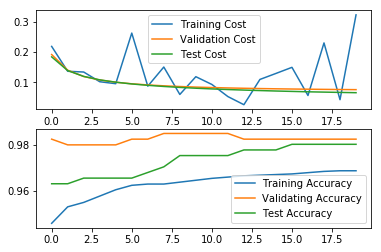

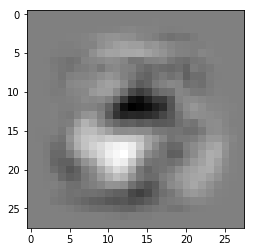

In [7]:
logistic_classifier(train_images, train_labels, test_images, test_labels, 2, 3)

Logistic Regression on Category 2 and 8 Accuracy: 96.103896 %


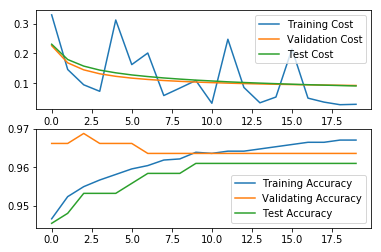

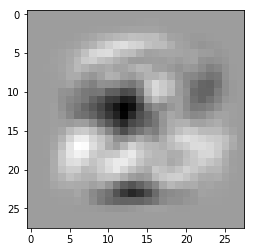

In [8]:
logistic_classifier(train_images, train_labels, test_images, test_labels, 2, 8)

In [ ]:
def plot_learning_rate(train_X, test_X, test_labels, c1, c2):
    train_X, train_Y = extract_target_data(train_X, train_labels, c1, c2)
    test_X, test_Y = extract_target_data(test_X, test_labels, c1, c2)

    n_feature = train_X.shape[0]

    sigmoid_2_model = LogisticRegression(n_feature, n_epoch=400)
    acc_l = []
    
    for i in range(-4, 1):
        sigmoid_2_model.learning_rate = 10**(i)
        sigmoid_2_model.w, sigmoid_2_model.b = init_parameters(n_feature, 1)
        train, val, test = sigmoid_2_model.fit(train_X, train_Y, test_X=test_X, test_Y=test_Y)
        sigmoid_2_model.predict(test_X, test_Y)
        acc_l.append(sigmoid_2_model.accuracy)
        print('Softmax Regression on Category %d and %d in learning rate %f Accuracy: %f %%' % (c1, c2, 10**(i), sigmoid_2_model.accuracy * 100))
    print(acc_l)
    plt.plot(range(-4,1), acc_l)
    plt.xlabel('learning rate(log)')
    plt.ylabel('Accuracy(%)')
    plt.show()

In [2]:
def plot_lambda(train_X, test_X, test_labels, c1, c2,r):
    train_X, train_Y = extract_target_data(train_X, train_labels, c1, c2)
    test_X, test_Y = extract_target_data(test_X, test_labels, c1, c2)

    n_feature = train_X.shape[0]

    sigmoid_2_model = LogisticRegression(n_feature, n_epoch=400, regularized=r)
    sigmoid_2_model.fjfsljfadkjasiofdi=1
    acc_l = []
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    legends = []
    for i in range(-4, 1):
        sigmoid_2_model.lamda = 10**(i)
        sigmoid_2_model.w, sigmoid_2_model.b = init_parameters(n_feature, 1)
        train, val, test = sigmoid_2_model.fit(train_X, train_Y, test_X=test_X, test_Y=test_Y)
        l, = ax1.plot(train['accuracy'],label='lambda=%d'%(i))
        legends.append(l)
        sigmoid_2_model.predict(test_X, test_Y)
        acc_l.append(sigmoid_2_model.accuracy)
        print('Softmax Regression on Category %d and %d in lamda %f Accuracy: %f %%' % (c1, c2, 10**(i), sigmoid_2_model.accuracy * 100))
    ax1.legend(handles=legends)
    plt.show()
    print(acc_l)
    
    fig2 = plt.figure()
    ax2 = fig2.add_subplot(111)
    ax2.plot(range(-4,1), acc_l)
    plt.xlabel('lambda(log)')
    plt.ylabel('Accuracy(%)')
    plt.show()

0 epoches cost: 0.680578
20 epoches cost: 0.539893
40 epoches cost: 0.378950
60 epoches cost: 0.360114
80 epoches cost: 0.345704
100 epoches cost: 0.203959
120 epoches cost: 0.318694
140 epoches cost: 0.193830
160 epoches cost: 0.156853
180 epoches cost: 0.154891
200 epoches cost: 0.286762
220 epoches cost: 0.248333
240 epoches cost: 0.150657
260 epoches cost: 0.178540
280 epoches cost: 0.190003
300 epoches cost: 0.151577
320 epoches cost: 0.124796
340 epoches cost: 0.094097
360 epoches cost: 0.113364
380 epoches cost: 0.199938
Softmax Regression on Category 2 and 3 in learning rate 0.000100 Accuracy: 96.296296 %
0 epoches cost: 0.581264
20 epoches cost: 0.211419
40 epoches cost: 0.112820
60 epoches cost: 0.117333
80 epoches cost: 0.109373
100 epoches cost: 0.161788
120 epoches cost: 0.061516
140 epoches cost: 0.146436
160 epoches cost: 0.079646
180 epoches cost: 0.062085
200 epoches cost: 0.044053
220 epoches cost: 0.039896
240 epoches cost: 0.263461
260 epoches cost: 0.112152
280 epo

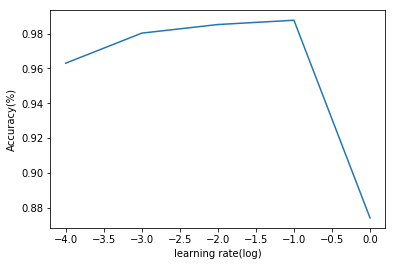

In [50]:
plot_learning_rate(train_X, test_X, test_labels, 2, 3)

0 epoches cost: 0.681882
20 epoches cost: 0.506340
40 epoches cost: 0.420979
60 epoches cost: 0.336753
80 epoches cost: 0.310330
100 epoches cost: 0.256355
120 epoches cost: 0.342332
140 epoches cost: 0.264892
160 epoches cost: 0.254057
180 epoches cost: 0.216917
200 epoches cost: 0.222624
220 epoches cost: 0.211970
240 epoches cost: 0.206374
260 epoches cost: 0.156146
280 epoches cost: 0.179751
300 epoches cost: 0.126023
320 epoches cost: 0.136714
340 epoches cost: 0.189092
360 epoches cost: 0.162484
380 epoches cost: 0.171869
Softmax Regression on Category 2 and 3 in lamda 0.000100 Accuracy: 73.170732 %
0 epoches cost: 0.683389
20 epoches cost: 0.496132
40 epoches cost: 0.371707
60 epoches cost: 0.302182
80 epoches cost: 0.285041
100 epoches cost: 0.253880
120 epoches cost: 0.264089
140 epoches cost: 0.205270
160 epoches cost: 0.218987
180 epoches cost: 0.280000
200 epoches cost: 0.218602
220 epoches cost: 0.169978
240 epoches cost: 0.157433
260 epoches cost: 0.180967
280 epoches cos

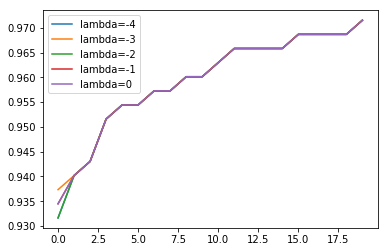

[0.7317073170731707, 0.7317073170731707, 0.7317073170731707, 0.7317073170731707, 0.7317073170731707]


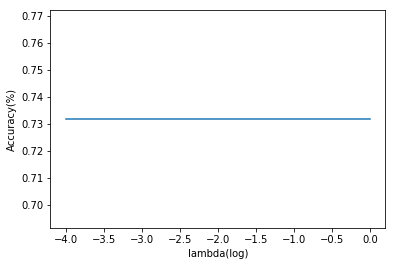

In [7]:
plot_lambda(train_X, test_X, test_labels, 2, 3, r=2)

In [12]:

train_X, train_Y = extract_target_data(train_X, train_labels, 2, 3
                                      )
test_X, test_Y = extract_target_data(test_X, test_labels, 2, 3)

n_feature = train_X.shape[0]


0 epoches cost: 0.577257
20 epoches cost: 0.226911
40 epoches cost: 0.177106
60 epoches cost: 0.164536
80 epoches cost: 0.184654
100 epoches cost: 0.082205
120 epoches cost: 0.143027
140 epoches cost: 0.023462
160 epoches cost: 0.081744
180 epoches cost: 0.151725
200 epoches cost: 0.066062
220 epoches cost: 0.061186
240 epoches cost: 0.193998
260 epoches cost: 0.039983
280 epoches cost: 0.063598
300 epoches cost: 0.045758
320 epoches cost: 0.104911
340 epoches cost: 0.034064
360 epoches cost: 0.126335
380 epoches cost: 0.065791
train 0.9700416088765603
Logistic  Regression on Category 2 and 3 in lamda 0.000100 Accuracy: 97.000000 %
0 epoches cost: 0.582798
20 epoches cost: 0.282573
40 epoches cost: 0.148483
60 epoches cost: 0.073349
80 epoches cost: 0.090618
100 epoches cost: 0.073052
120 epoches cost: 0.074661
140 epoches cost: 0.047201
160 epoches cost: 0.040328
180 epoches cost: 0.028642
200 epoches cost: 0.113049
220 epoches cost: 0.087326
240 epoches cost: 0.060293
260 epoches cos

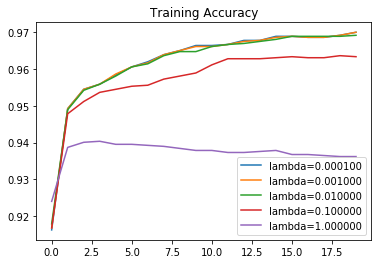

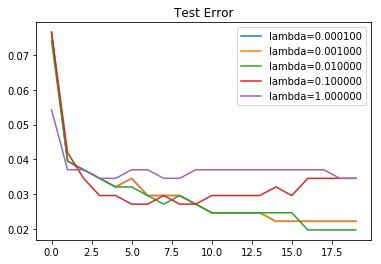

[0.022222222222222254, 0.022222222222222254, 0.01975308641975304, 0.03456790123456788, 0.03456790123456788]


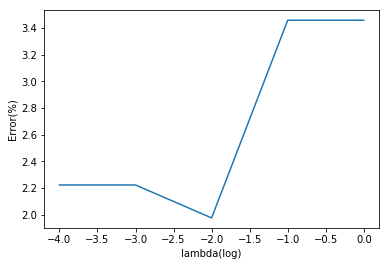

In [29]:
# Regularization 1
sigmoid_2_model = LogisticRegression(n_feature, n_epoch=400)
regularized = 1
sigmoid_2_model.regularized = regularized
acc_l = []
fig1 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot(111)
ax3 = fig3.add_subplot(111)
legends = []
weight_length = []
weights1 = []
for i in range(-4, 1):
    sigmoid_2_model.lambd = 10**(i)
    sigmoid_2_model.w, sigmoid_2_model.b = init_parameters(n_feature, 1)
    train, val, test = sigmoid_2_model.fit(train_X, train_Y, test_X=test_X, test_Y=test_Y)
    weight_length.append(np.linalg.norm(sigmoid_2_model.w, 2))
    l, = ax1.plot(train['accuracy'],label='lambda=%f'%(10**i))
    l3, = ax3.plot(1-np.array(test['accuracy']) ,label='lambda=%f'%(10**i))
    weights1.append(sigmoid_2_model.w)
    print('train',train['accuracy'][-1])
    legends.append(l)

    acc_l.append(1 - test['accuracy'][-1])
    print('Logistic  Regression on Category %d and %d in lamda %f Accuracy: %f %%' \
          % (2, 3, 10**(i), sigmoid_2_model.accuracy * 100))
ax1.legend(handles=legends)
ax1.set_title('Training Accuracy')
ax3.legend(handles=legends)
ax3.set_title('Test Error')
plt.show()
print(acc_l)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(range(-4,1), np.array(acc_l)*100)
plt.xlabel('lambda(log)')
plt.ylabel('Error(%)')
plt.show()




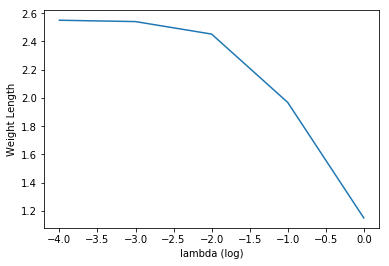

In [30]:
fig4 = plt.figure()
plt.plot(range(-4,1), weight_length)
plt.xlabel("lambda (log)")
plt.ylabel("Weight Length")
plt.show()

0 epoches cost: 0.564408
20 epoches cost: 0.311050
40 epoches cost: 0.105009
60 epoches cost: 0.104233
80 epoches cost: 0.100553
100 epoches cost: 0.130475
120 epoches cost: 0.063938
140 epoches cost: 0.376887
160 epoches cost: 0.160391
180 epoches cost: 0.066320
200 epoches cost: 0.132670
220 epoches cost: 0.188931
240 epoches cost: 0.211025
260 epoches cost: 0.046941
280 epoches cost: 0.219129
300 epoches cost: 0.077453
320 epoches cost: 0.080770
340 epoches cost: 0.094710
360 epoches cost: 0.146197
380 epoches cost: 0.049707
train 0.9700416088765603
Logistic  Regression on Category 2 and 3 in lamda 0.000100 Accuracy: 97.000000 %
0 epoches cost: 0.571880
20 epoches cost: 0.243755
40 epoches cost: 0.095275
60 epoches cost: 0.186279
80 epoches cost: 0.239955
100 epoches cost: 0.180299
120 epoches cost: 0.053099
140 epoches cost: 0.051734
160 epoches cost: 0.034721
180 epoches cost: 0.249223
200 epoches cost: 0.103208
220 epoches cost: 0.062909
240 epoches cost: 0.066380
260 epoches cos

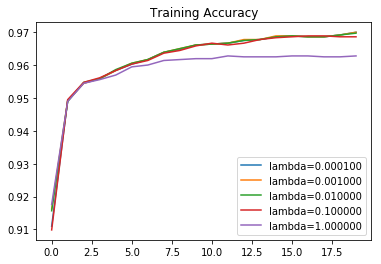

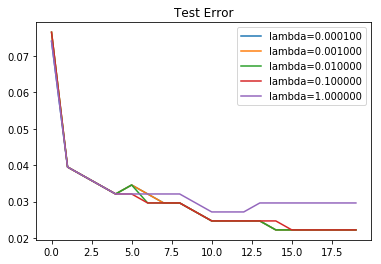

[0.022222222222222254, 0.022222222222222254, 0.022222222222222254, 0.022222222222222254, 0.029629629629629672]


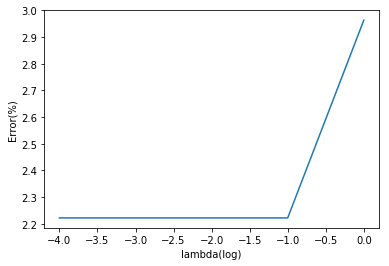

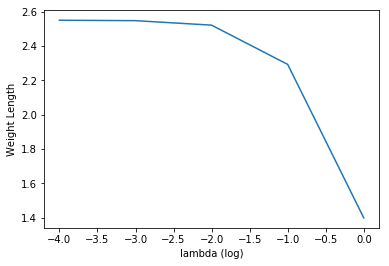

In [31]:
# Regularization 2
sigmoid_2_model = LogisticRegression(n_feature, n_epoch=400)
regularized = 2
sigmoid_2_model.regularized = regularized
acc_l = []
fig1 = plt.figure()
fig3 = plt.figure()
ax1 = fig1.add_subplot(111)
ax3 = fig3.add_subplot(111)
legends = []

weight_length = []
weights2 = []
for i in range(-4, 1):
    sigmoid_2_model.lambd = 10**(i)
    sigmoid_2_model.w, sigmoid_2_model.b = init_parameters(n_feature, 1)
    train, val, test = sigmoid_2_model.fit(train_X, train_Y, test_X=test_X, test_Y=test_Y)
    weight_length.append(np.linalg.norm(sigmoid_2_model.w, regularized))
    l, = ax1.plot(train['accuracy'],label='lambda=%f'%(10**i))
    l3, = ax3.plot(1-np.array(test['accuracy']) ,label='lambda=%f'%(10**i))
    weights2.append(sigmoid_2_model.w)
    print('train',train['accuracy'][-1])
    legends.append(l)

    acc_l.append(1 - test['accuracy'][-1])
    print('Logistic  Regression on Category %d and %d in lamda %f Accuracy: %f %%' \
          % (2, 3, 10**(i), sigmoid_2_model.accuracy * 100))
ax1.legend(handles=legends)
ax1.set_title('Training Accuracy')
ax3.legend(handles=legends)
ax3.set_title('Test Error')
plt.show()
print(acc_l)

fig2 = plt.figure()
ax2 = fig2.add_subplot(111)
ax2.plot(range(-4,1), np.array(acc_l)*100)
plt.xlabel('lambda(log)')
plt.ylabel('Error(%)')
plt.show()

fig4 = plt.figure()
plt.plot(range(-4,1), weight_length)
plt.xlabel("lambda (log)")
plt.ylabel("Weight Length")
plt.show()



2.5221529128735964
2.293386920666309
1.3983096018696957


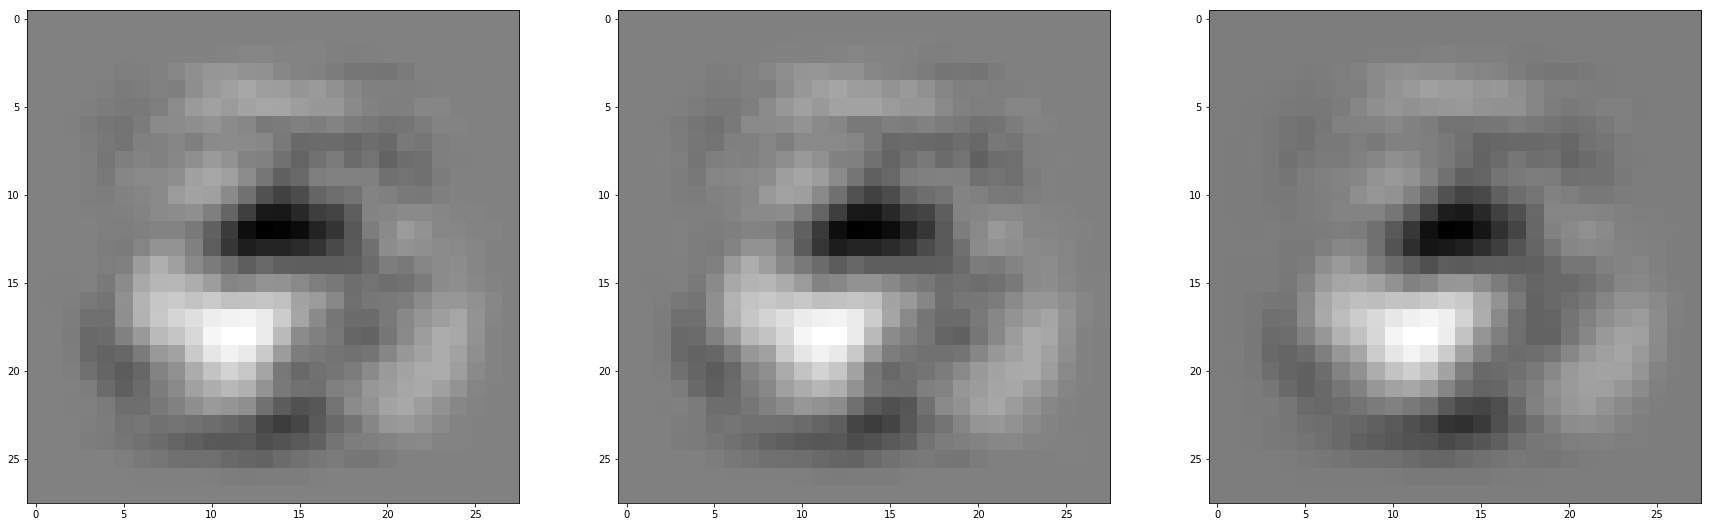

In [45]:
weightf=plt.figure(figsize=(30,100))
for i in range(2,5):
    ax = weightf.add_subplot(1,3,i-1)

    print(np.linalg.norm(weights2[i]))
    ax.imshow(weights2[i].reshape(28,28))
